<a href="https://colab.research.google.com/github/macintoxic/.Touch/blob/master/trabalho_pratico1/trabalho_pratico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho prático N. 1

## Faz o download da planilha exportada do site status invest.

In [192]:
#!curl https://github.com/macintoxic/BootCampRendaVariavel/raw/main/trabalho_pratico1/statusinvest-busca-avancada2.xlsx --output /content/statusinvest-busca-avancada2.xlsx

#cria as pastas
!mkdir /content/01_Bruto
!mkdir /content/02_Limpo
!mkdir /content/03_Saidas

!wget -O /content/01_Bruto/statusinvest-busca-avancada.csv https://github.com/macintoxic/BootCampRendaVariavel/raw/main/trabalho_pratico1/01_Bruto/statusinvest-busca-avancada.csv
!wget -O /content/02_Limpo/statusinvest-busca-avancada2.xlsx https://github.com/macintoxic/BootCampRendaVariavel/raw/main/trabalho_pratico1/02_Limpo/statusinvest-busca-avancada2.xlsx

mkdir: cannot create directory ‘/content/02_Limpo’: File exists
mkdir: cannot create directory ‘/content/03_Saidas’: File exists
--2023-03-20 17:50:03--  https://github.com/macintoxic/BootCampRendaVariavel/raw/main/trabalho_pratico1/01_Bruto/statusinvest-busca-avancada.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/macintoxic/BootCampRendaVariavel/main/trabalho_pratico1/01_Bruto/statusinvest-busca-avancada.csv [following]
--2023-03-20 17:50:03--  https://raw.githubusercontent.com/macintoxic/BootCampRendaVariavel/main/trabalho_pratico1/01_Bruto/statusinvest-busca-avancada.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

## Fazer uma primeira análise exploratória dos dados utilizando o recurso Head do Print;

In [182]:
import pandas as pd

df = pd.read_excel("/content/02_Limpo/statusinvest-busca-avancada2.xlsx")

df.head()


,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,22.35,0.00,-19.50,2.31,1.03,30.55,-0.34,-12.41,-705.65,...,0.45,0.54,0.42,3.62,0.00,1.178053e+07,9.68,-1.15,0.04,2.656857e+09
1,ABCB4,16.85,8.32,4.75,0.73,0.07,35.76,27.56,19.63,3.38,...,0.09,0.91,0.07,13.58,13.36,1.810353e+07,23.02,3.54,0.12,3.823184e+09
2,ABEV3,14.22,5.40,15.37,2.67,1.61,49.29,22.15,18.14,12.58,...,0.60,0.40,0.58,10.72,14.74,4.443646e+08,5.29,0.92,1.09,2.244406e+11
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,0.00,0.00,0.000000e+00,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,1.30,1.62,-10.58,1.11,0.26,11.93,8.65,-3.76,4.59,...,0.23,0.77,0.65,0.00,0.00,9.253600e+06,1.15,-0.12,0.05,1.003740e+09


## Seleciona o papel com o maior preço

In [183]:
ticker = df.iloc[df['PRECO'].argmax()]['TICKER']

print(f'Papel com o maior preço: {ticker} ')

Papel com o maior preço: BTTL4 


## Seleciona os 10 maiores preços

In [184]:

df.nlargest(n=10, columns=['PRECO'])[['TICKER', 'PRECO']]

,TICKER,PRECO
111,BTTL4,11091.73
47,BBML3,3936.42
26,APTI4,3500.00
416,ODER4,857.15
393,MSRO3,702.50
380,MOAR3,450.00
219,EEEL4,410.00
70,BMKS3,357.87
415,NUTR3,300.00
218,EEEL3,294.77


## Seleciona os 10 menores preços

In [185]:

df.nsmallest(n=10, columns=['PRECO'])[['TICKER', 'PRECO']]

,TICKER,PRECO
54,BFRE11,0.0
55,BFRE12,0.0
74,BOBR3,0.0
86,BRBI3,0.0
87,BRBI4,0.0
104,BRQB3,0.0
121,CATA4,0.0
155,CMSA3,0.0
156,CMSA4,0.0
188,CTCA3,0.0


## Soma e a média da Liquidez Média Diária


In [186]:


soma = df[' LIQUIDEZ MEDIA DIARIA'].sum()
media =df[' LIQUIDEZ MEDIA DIARIA'].mean()
print(f'Soma da liquidez diária: {soma}')

df[' LIQUIDEZ MEDIA DIARIA'].mean()

print(f'Média da liquidez diária: {media}')




Soma da liquidez diária: 21563942104.210003
Média da liquidez diária: 35880103.33479202


## Encontrar os nomes dos ativos com P/L maior que 0

In [187]:
df[df['P/L'] > 0][['TICKER','P/L']]

,TICKER,P/L
1,ABCB4,4.75
2,ABEV3,15.37
5,AESB3,39.81
6,AFLT3,15.30
7,AGRO3,17.56
...,...,...
594,WHRL3,12.16
595,WHRL4,12.41
596,WIZC3,6.83
597,WLMM3,7.06


## Encontrar os ativos com DY acima de 0;

In [188]:
df[df['DY'] > 0][['TICKER','DY']]

,TICKER,DY
1,ABCB4,8.32
2,ABEV3,5.40
4,AERI3,1.62
5,AESB3,1.09
6,AFLT3,2.60
...,...,...
595,WHRL4,4.60
596,WIZC3,10.23
597,WLMM3,6.18
598,WLMM4,3.98


## Listar as ações do tipo preferenciais PN (código 4) e jogar a saída em um arquivo TXT de nome (AcoesPN.txt);

In [189]:
acoes_pn = df.loc[df['TICKER'].str.endswith('4')][['TICKER']]
acoes_pn.to_csv(r'/content/03_Saidas/AcoesPN.txt', header=None, index=None, sep=' ', mode='a')

## Listar as 10 ações com maior Liquidez Média Diária e mostrar o resultado em um gráfico de colunas, sendo o eixo X os nomes dos ativos e o eixo Y o valor da Liquidez Média Diária;

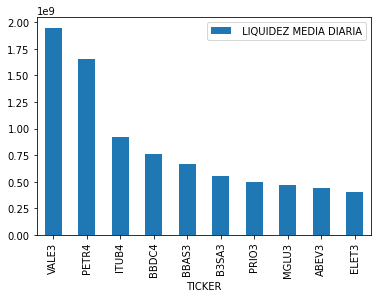

In [190]:
import matplotlib.pyplot as plt

g = df.nlargest(n=10, columns=[' LIQUIDEZ MEDIA DIARIA'])[['TICKER', ' LIQUIDEZ MEDIA DIARIA']]

fig = g.plot.bar(x='TICKER', y=' LIQUIDEZ MEDIA DIARIA').get_figure()

## Salva o gráfico

In [191]:

fig.savefig('/content/03_Saidas/grafico.png')
